# Challenge 1 : Eneygy Data Sumiluation 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn import metrics
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn import preprocessing
from sklearn import svm



%matplotlib inline

In [2]:
# Import Data sets
training_df = pd.read_csv('data/training_dataset_500.csv')
testing_df = pd.read_csv('data/test_dataset_500.csv')


## EDA

In [3]:
training_df.head()

,ID,Label,House,Year,Month,Temperature,Daylight,EnergyProduction
0,0,0,1,2011,7,26.2,178.9,740
1,1,1,1,2011,8,25.8,169.7,731
2,2,2,1,2011,9,22.8,170.2,694
3,3,3,1,2011,10,16.4,169.1,688
4,4,4,1,2011,11,11.4,169.1,650


In [4]:
# Data Types
training_df.dtypes

ID                    int64
Label                 int64
House                 int64
Year                  int64
Month                 int64
Temperature         float64
Daylight            float64
EnergyProduction      int64
dtype: object

In [5]:
# Summary of Data Frame
training_df.describe()

,ID,Label,House,Year,Month,Temperature,Daylight,EnergyProduction
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,5999.000000,11.000000,250.500000,2011.956522,6.521739,14.372348,189.121870,612.748870
std,3464.251661,6.633538,144.343555,0.690226,3.524843,8.490811,29.432125,142.006144
min,0.000000,0.000000,1.000000,2011.000000,1.000000,0.800000,133.700000,254.000000
25%,2999.500000,5.000000,125.750000,2011.000000,3.000000,5.300000,169.100000,509.000000
50%,5999.000000,11.000000,250.500000,2012.000000,7.000000,13.200000,181.800000,592.000000
75%,8998.500000,17.000000,375.250000,2012.000000,10.000000,22.800000,205.200000,698.000000
max,11998.000000,22.000000,500.000000,2013.000000,12.000000,29.000000,271.300000,1254.000000


In [6]:
# No of Unique house hold and value check
print("No of Houseolds: ",training_df.House.nunique())
print("No of data points for each Household: ",np.mean(training_df.House.value_counts()))

No of Houseolds:  500
No of data points for each Household:  23.0


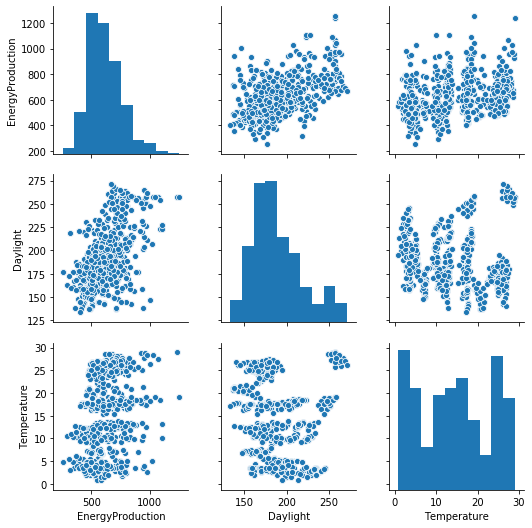

In [7]:
sns.pairplot(training_df[['EnergyProduction','Daylight','Temperature']])

It seems House, Month, Temperature and Daylight are the important key features. But lets validate that using SVM

In [8]:
X_train = training_df.drop(labels="EnergyProduction", axis=1)
y_train = training_df[["EnergyProduction"]]
X_test = testing_df.drop(labels="EnergyProduction", axis=1)
y_test = np.array(testing_df[["EnergyProduction"]])

In [9]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/anaconda3/envs/smapenergy/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/smapenergy/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/anaconda3/envs/smapenergy/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/anaconda3/envs/smapenergy/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/smapenergy/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y wa

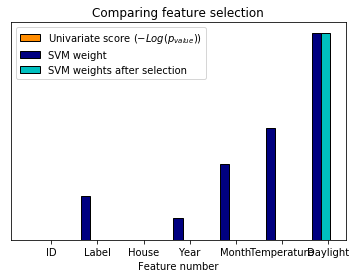

In [10]:
X_indices = np.arange(X_train.shape[-1])
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
        color='navy', edgecolor='black')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X_train), y_train)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='c',
        edgecolor='black')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.xticks(X_indices,['ID',  'Label', 'House', 'Year', 'Month', 'Temperature', 'Daylight'])
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper left')
plt.show()

It seems House featue has no weighting in this data set, but lets dig a bit more by running asic LinearReagression model

In [11]:
def mape(y_test, y_pred):
    
    """
    Calclates Mean Absolute Percentage Error
    """
    return np.mean(np.abs((np.array(y_test) - np.array(y_pred))/ y_test))*100




In [12]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
lpred= lreg.predict(X_test)
print("MAPE using Linear Regression:",mape(y_test, lpred))

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

print ("MAPE using RandomForest Regression: ", mape( y_test, rfr.predict(X_test)))

MAPE using Linear Regression: 14.356221193905332


/anaconda3/envs/smapenergy/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/smapenergy/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


MAPE using RandomForest Regression:  31.709256075129232


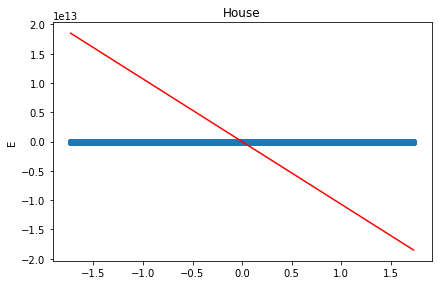

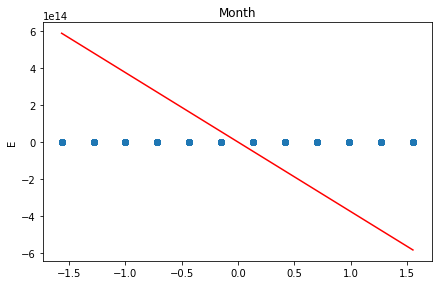

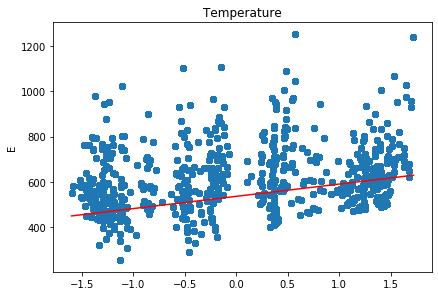

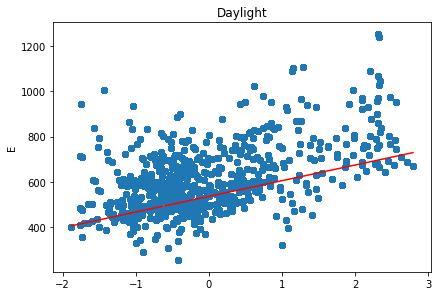

In [13]:
xlabel = ['House','Month','Temperature','Daylight']
col_index = [2, 4, 5, 6]
for i, col in enumerate(col_index):
    fig, axes = plt.subplots(1, 1)
    plt.scatter(X_train[:, col], y_train)
    xr = np.asarray([min(X_train[:, col]), max(X_train[:, col])])
    yr = xr * lreg.coef_.flatten()[col] + lreg.intercept_
    plt.plot(xr, yr, color = 'red')

    fig.tight_layout()
    plt.title(xlabel[i])
    plt.ylabel('E')

plt.show()

Daylight and Temperature seems to fit fine with Energy Production. So, I added Mean and subtracted mean from the actual to get the diffence and used Mean data to predict Eneergy Production to if that could give us better results

Let's run couple of ML Models to if that make any differece to MAPE value

In [14]:
def mean_squared_error_(ground_truth, predictions):
    return mean_squared_error(ground_truth, predictions) ** 0.5
RMSE = make_scorer(mean_squared_error_, greater_is_better=False)
def data_preprocessing(training_data, testing_data):
    
    """
    Adds Mean Energt Production column and Menan Difference Columns and Scales both Training and Testing Data
    
    """
    training_df['EnergyProduction']=training_df.EnergyProduction.astype(float)
    testing_df['EnergyProduction']=testing_df.EnergyProduction.astype(float)
    training_df['Mean_EnergyProduction'] = training_df[["House","EnergyProduction"]].groupby('House').transform(lambda x: x.mean())
    training_df['mean_diff'] = training_df[["House","EnergyProduction"]].groupby('House').transform(lambda x: (x - x.mean()))

    testing_df['Mean_EnergyProduction'] = testing_df[["House","EnergyProduction"]].groupby('House').transform(lambda x: x.mean())
    testing_df['mean_diff'] = testing_df[["House","EnergyProduction"]].groupby('House').transform(lambda x: (x - x.mean()))
    x_train = training_df.iloc[:, [4, 5, 6, 8]]
    y_train = training_df.iloc[:,7]
    x_test = testing_df.iloc[:, [4, 5, 6, 8]]
    y_test = np.array(testing_df.iloc[:, 7])
    scaler = preprocessing.StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    
    return x_train, y_train, x_test, y_test




In [15]:
def ml_models(training_data, testing_data):
    """
    Runs Linear Regresssion and RandomForestRegressor models
    """
    data = data_preprocessing(training_data, testing_data)
    
    x_train = data[0]
    y_train = data[1]
    x_test = data[2]
    y_test = data[3]
    
    
#     rfr_param_grid = {'n_estimators': [100,300, 500, 800,1000, 1500],
#                      "max_features": sqrt}
    rfr_param_grid = {'n_estimators': [100,300, 500],
                     "max_features": ["sqrt"]}
    
    # Assigning  Regression models
    
    lreg_model = LinearRegression()
    rfr_model = RandomForestRegressor()
    
    rfr_model_estimator = GridSearchCV(estimator= rfr_model,
                        param_grid = rfr_param_grid, n_jobs=1, cv=10, scoring=RMSE)
    
    
    
    #Training models 

    lreg_model.fit(x_train, y_train)
    rfr_model_estimator.fit(x_train, y_train)
    
    #Predeictions

    y_pred_lreg = lreg_model.predict(x_test)
    y_pred_rfr = rfr_model_estimator.predict(x_test)
    
    #Errors
    lreg_errors = abs(y_test - y_pred_lreg)
    rfr_errors = abs(y_test - y_pred_rfr)
    
    #MAPE
    lreg_mape = 100 *np.mean( lreg_errors/ y_test)
    rfr_mape = 100 *np.mean( rfr_errors/ y_test)
    
    #Accuracy
    lreg_accur = round(100 - lreg_mape, 2)
    rfr_accur= round(100 - rfr_mape,2)
    
    ##Create dictionary
    dict_scores ={"Model": ["Linear Regression",
                             "Random Forest Regression"],
             "MAPE %":[lreg_mape, rfr_mape],
             "Model Accuracy %": [lreg_accur,rfr_accur] }
    #Convert dictionary to a dataframe
    df_score = pd.DataFrame(dict_scores, index= dict_scores["Model"])
    
    
    
    #Plots
    plt.scatter(y_test, y_pred_lreg, cmap=plt.cm.Paired)
    low = min(np.append(y_test, y_pred_lreg))
    hig = max(np.append(y_test, y_pred_lreg))
    plt.plot([low,hig], [low,hig], '-')
    plt.xlabel('True Energy Produced')
    plt.ylabel('Predicted Energy Produced')
    plt.title("Linear Regression Model - Prediction")
    plt.show()
    
    
    #Random Forest regression
    plt.scatter(y_test, y_pred_rfr, cmap=plt.cm.Paired)
    low = min(np.append(y_test, y_pred_rfr))
    hig = max(np.append(y_test, y_pred_rfr))
    plt.plot([low,hig], [low,hig], '-')
    plt.xlabel('True Energy Produced')
    plt.ylabel('Predicted Energy Produced')
    plt.title("RandomForest Regression Model - Prediction")
    plt.show()
    
#     print(df_score)
    # Data Exports
    pd.DataFrame(y_pred_rfr).to_csv("predicted_energy_production.csv")
    df_score.to_csv("models_scores.csv")
    
    with open("mape.txt", "w") as text_file:
        print(f"mape: {rfr_mape}", file=text_file)
    
    return df_score

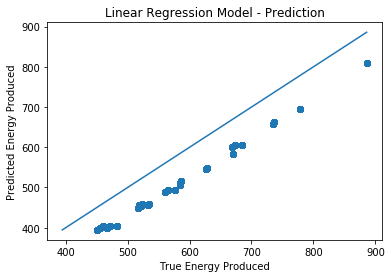

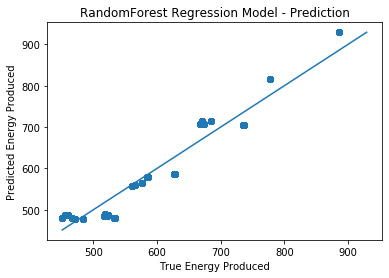

,Model,MAPE %,Model Accuracy %
Linear Regression,Linear Regression,12.440322,87.56
Random Forest Regression,Random Forest Regression,4.762354,95.24


In [16]:
ml_models(training_data= training_df, testing_data= testing_df)

Conclusion:

RandomForest seems to give better MAPE and Accuracy. However, but adding few other features to model such as post code of Household, Region, no of people living in the house etc. could help us understand more about the behaviour of energy production. If possbile collect data at mode granular level by day and map it with weather and clouds information and see that could tell us a different story of energy production. Also, if data is collected at day level, we could then use other packages such as prophet and populate time series predictions. 